In [1]:
import osmnx as ox
import time
import matplotlib.pyplot as plt
import os
import pandas as pd
import folium
import ast
import random

In [2]:

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = gdf_edges.index
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)





osmnx version 1.9.4


In [3]:
#place ="Porto City, Portugal"
place='Porto, Portugal'
G = ox.graph_from_place(place, network_type='drive', which_result=2)
start_time = time.time()
save_graph_shapefile_directional(G, filepath='./data/porto')
print("--- %s seconds ---" % (time.time() - start_time))

/var/folders/_6/2sxd3q_d65b9mp5y1l5_0g7r0000gn/T/ipykernel_12456/3441653945.py:14: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
/var/folders/_6/2sxd3q_d65b9mp5y1l5_0g7r0000gn/T/ipykernel_12456/3441653945.py:20: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


--- 12.983221054077148 seconds ---


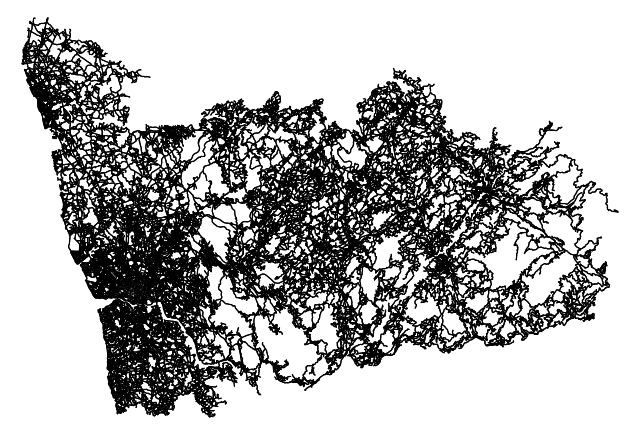

In [5]:

# Plot and save the road network graph
fig, ax = ox.plot_graph(
    G,
    bgcolor='white',
    node_size=0,
    edge_color='black',
    edge_linewidth=0.8,
    save=True,
    filepath="porto_road_network.png",
    dpi=300  # optional: increase resolution for better quality
)

plt.show()

In [6]:
# Save the graph as a GraphML file
ox.save_graphml(G, filepath="porto_road_network.graphml")

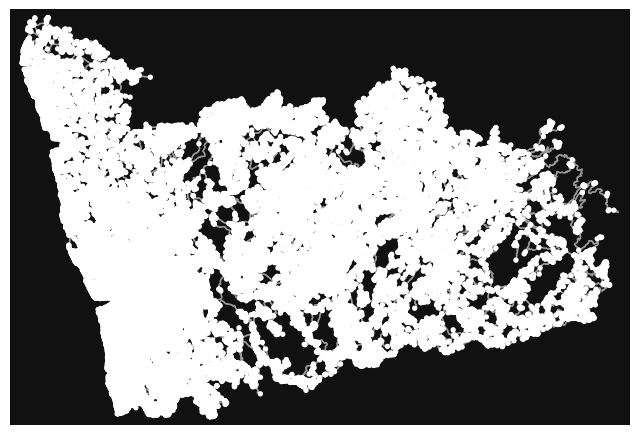

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
ox.plot_graph(G)

In [11]:
# Read the dataset

df_1500 = pd.read_csv('kraggle_data/train/train.csv', nrows = 1500)
train_1500 = pd.DataFrame(df_1500)
# df_1500.to_csv('data/train-1500.csv', index=False)

In [12]:
train_1500

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
...,...,...,...,...,...,...,...,...,...
1495,1372672434620000051,B,NaN,44.0,20000051,1372672434,A,False,"[[-8.625447,41.149332],[-8.625429,41.149323],[..."
1496,1372674326620000557,B,NaN,13.0,20000557,1372674326,A,False,"[[-8.62839,41.15718],[-8.628183,41.15736],[-8...."
1497,1372672055620000653,B,NaN,18.0,20000653,1372672055,A,False,"[[-8.619777,41.148018],[-8.620056,41.147793],[..."
1498,1372673543620000598,C,NaN,NaN,20000598,1372673543,A,False,"[[-8.58654,41.148999],[-8.587233,41.149125],[-..."


In [14]:
train_1500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       1500 non-null   int64  
 1   CALL_TYPE     1500 non-null   object 
 2   ORIGIN_CALL   406 non-null    float64
 3   ORIGIN_STAND  689 non-null    float64
 4   TAXI_ID       1500 non-null   int64  
 5   TIMESTAMP     1500 non-null   int64  
 6   DAY_TYPE      1500 non-null   object 
 7   MISSING_DATA  1500 non-null   bool   
 8   POLYLINE      1500 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 95.3+ KB


In [17]:
train_1500['TRIP_ID'].nunique()

1500

CALL_TYPE

‘A’ if this trip was dispatched from the central;

‘B’ if this trip was demanded directly to a taxi driver on a specific stand;

‘C’ otherwise (i.e. a trip demanded on a random street).

In [27]:
train_1500['CALL_TYPE'].value_counts()

CALL_TYPE
B    701
A    406
C    393
Name: count, dtype: int64

In [20]:
train_1500['ORIGIN_CALL'].nunique()

283

In [21]:
train_1500['ORIGIN_STAND'].nunique()

56

In [22]:
train_1500['TAXI_ID'].nunique()

352

DAY_TYPE

'B’ if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.);

‘C’ if the trip started on a day before a type-B day;

‘A’ otherwise (i.e. a normal day, workday or weekend).

In [23]:
train_1500["DAY_TYPE"].value_counts()

DAY_TYPE
A    1500
Name: count, dtype: int64

In [15]:
train_1500['MISSING_DATA'].value_counts()

MISSING_DATA
False    1500
Name: count, dtype: int64

In [28]:
train_1500['POLYLINE'].head()

0    [[-8.618643,41.141412],[-8.618499,41.141376],[...
1    [[-8.639847,41.159826],[-8.640351,41.159871],[...
2    [[-8.612964,41.140359],[-8.613378,41.14035],[-...
3    [[-8.574678,41.151951],[-8.574705,41.151942],[...
4    [[-8.645994,41.18049],[-8.645949,41.180517],[-...
Name: POLYLINE, dtype: object

In [33]:
type(train_1500['POLYLINE'][0])

str

In [44]:
train_1500['POLYLINE'][0]

'[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]'

In [47]:
# Convert the string to a nested list of coordinates
polyline_list = ast.literal_eval(train_1500['POLYLINE'][0])

print(polyline_list, type(polyline_list))

[[-8.618643, 41.141412], [-8.618499, 41.141376], [-8.620326, 41.14251], [-8.622153, 41.143815], [-8.623953, 41.144373], [-8.62668, 41.144778], [-8.627373, 41.144697], [-8.630226, 41.14521], [-8.632746, 41.14692], [-8.631738, 41.148225], [-8.629938, 41.150385], [-8.62911, 41.151213], [-8.629128, 41.15124], [-8.628786, 41.152203], [-8.628687, 41.152374], [-8.628759, 41.152518], [-8.630838, 41.15268], [-8.632323, 41.153022], [-8.631144, 41.154489], [-8.630829, 41.154507], [-8.630829, 41.154516], [-8.630829, 41.154498], [-8.630838, 41.154489]] <class 'list'>


In [48]:
# Initialize the map centered around Porto City
map_porto = folium.Map(location=[41.1579, -8.6291], zoom_start=13)


# Iterate through each polyline in the dataset
for polyline in train_1500['POLYLINE'].head():
    # Generate a random color for each polyline
    color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    polyline_list = ast.literal_eval(polyline)

    # Plot each polyline on the map
    folium.PolyLine(
        locations=[(lat, lon) for lon, lat in polyline_list],  # switch lon/lat for folium compatibility
        color=color,
        weight=5,
        opacity=0.7
    ).add_to(map_porto)

# Display the map
map_porto.save("porto_polylines.html")
map_porto